In [2]:
import hist
import boost_histogram as bh
import numpy as np
import mplhep as hep
import matplotlib.pyplot as plt
from wremnants import boostHistHelpers as hh
from wremnants import histselections as sel
from wremnants import datasets2016
from wremnants import plot_tools
import wremnants
import lz4.frame
import pickle
hep.style.use(hep.style.ROOT)

Welcome to JupyROOT 6.27/01


In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
with lz4.frame.open("../w_z_gen_dists.pkl.lz4") as f:
    file = pickle.load(f)
file['WplusmunuPostVFP'        ]["weight_sum"]

343753702.0

In [19]:
hist_ang_coeff = {}
sigma_UL = {}
boson_channels = ['wp', 'wm', 'z']
projection_axes = ['ptVgen', 'absYVgen']
for chn in boson_channels:
    hist_ang_coeff[chn] = {}
    sigma_UL[chn] = {}

# read full histogram for angular coefficients
hist_ang_coeff['wp']['bugged'] = file['WplusmunuPostVFP'        ]['output']['helicity_moments_scale']
hist_ang_coeff['wp']['bugfix'] = file['WplusmunuPostVFP_bugfix' ]['output']['helicity_moments_scale']
hist_ang_coeff['wm']['bugged'] = file['WminusmunuPostVFP'       ]['output']['helicity_moments_scale']
hist_ang_coeff['wm']['bugfix'] = file['WminusmunuPostVFP_bugfix']['output']['helicity_moments_scale']
hist_ang_coeff['z' ]['bugged'] = file['ZmumuPostVFP'            ]['output']['helicity_moments_scale']
hist_ang_coeff['z' ]['bugfix'] = file['ZmumuPostVFP_bugfix'     ]['output']['helicity_moments_scale']

s = hist.tag.Slicer()
sigma_UL['wp']['bugged'] = (file['WplusmunuPostVFP'        ]['output']['nominal_gen']* file["WplusmunuPostVFP"        ]["dataset"]["xsec"] / file["WplusmunuPostVFP"        ]["weight_sum"]).project('ptVgen')
sigma_UL['wp']['bugfix'] = (file['WplusmunuPostVFP_bugfix' ]['output']['nominal_gen']* file["WplusmunuPostVFP_bugfix" ]["dataset"]["xsec"] / file["WplusmunuPostVFP_bugfix" ]["weight_sum"]).project('ptVgen')
sigma_UL['wm']['bugged'] = (file['WminusmunuPostVFP'       ]['output']['nominal_gen']* file["WminusmunuPostVFP"       ]["dataset"]["xsec"] / file["WminusmunuPostVFP"       ]["weight_sum"]).project('ptVgen')
sigma_UL['wm']['bugfix'] = (file['WminusmunuPostVFP_bugfix']['output']['nominal_gen']* file["WminusmunuPostVFP_bugfix"]["dataset"]["xsec"] / file["WminusmunuPostVFP_bugfix"]["weight_sum"]).project('ptVgen')
sigma_UL['z' ]['bugged'] = (file['ZmumuPostVFP'            ]['output']['nominal_gen'][{'massVgen':s[80j:100j:hist.sum]}] * file["ZmumuPostVFP"]["dataset"]["xsec"] / file["ZmumuPostVFP"]["weight_sum"]).project('ptVgen')
sigma_UL['z' ]['bugfix'] = (file['ZmumuPostVFP_bugfix'     ]['output']['nominal_gen'][{'massVgen':s[80j:100j:hist.sum]}] * file["ZmumuPostVFP_bugfix"]["dataset"]["xsec"] / file["ZmumuPostVFP_bugfix"]["weight_sum"]).project('ptVgen')
# make projected 1D histograms; "normalize" and calculate the angular coefficients 
hist1D_ang_coeff = {}
s = hist.tag.Slicer()
for chn in boson_channels:
    hist1D_ang_coeff[chn] = {}
    for group in ['bugged', 'bugfix']:
        hist1D_ang_coeff[chn][group] = {}
        for ax in projection_axes:
            if chn == 'z':
                hist1D_ang_coeff[chn][group][ax] = wremnants.moments_to_angular_coeffs(hist_ang_coeff[chn][group][{'massVgen':s[80j:100j:hist.sum]}].project('helicity',ax))
            else:
                hist1D_ang_coeff[chn][group][ax] = wremnants.moments_to_angular_coeffs(hist_ang_coeff[chn][group].project('helicity',ax))


In [14]:
'''make plots for angular coefficients in the following scheme'''
#                Z
#-----------ptV A_0-7  ----------
#-----------etaV A_0-7 ----------
#                W+
#-----------ptV A_0-7  ----------
#-----------etaV A_0-7 ----------
#              W-
#-----------ptV A_0-7  ----------
#-----------etaV A_0-7 ----------
'''
fig, axs = plt.subplots(6, 9, figsize=(36,54))

for idx_ang in range(-1,8):
    for idx_ax, ax in enumerate(projection_axes):
         plot_tools.makePlotWithRatioToRef(
            [hist1D_ang_coeff['z']['bugged'][ax][{"helicity":idx_ang}], 
             hist1D_ang_coeff['z']['bugfix'][ax][{"helicity":idx_ang}]], 
            ["bugged", 'bugfix'], 
            colors=['black', 'red'], 
            xlabel=ax, 
            ylabel="Events/bin",
            rlabel="bugfix/bugged",
            xlim=None, binwnorm=None).plot(axs[0+idx_ax, idx_ang+1])

'''

'\nfig, axs = plt.subplots(6, 9, figsize=(36,54))\n\nfor idx_ang in range(-1,8):\n    for idx_ax, ax in enumerate(projection_axes):\n         plot_tools.makePlotWithRatioToRef(\n            [hist1D_ang_coeff[\'z\'][\'bugged\'][ax][{"helicity":idx_ang}], \n             hist1D_ang_coeff[\'z\'][\'bugfix\'][ax][{"helicity":idx_ang}]], \n            ["bugged", \'bugfix\'], \n            colors=[\'black\', \'red\'], \n            xlabel=ax, \n            ylabel="Events/bin",\n            rlabel="bugfix/bugged",\n            xlim=None, binwnorm=None).plot(axs[0+idx_ax, idx_ang+1])\n\n'

/home/t/tyjyang/analysis/wmass/WRemnants/wremnants/plot_tools.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8*width,8))


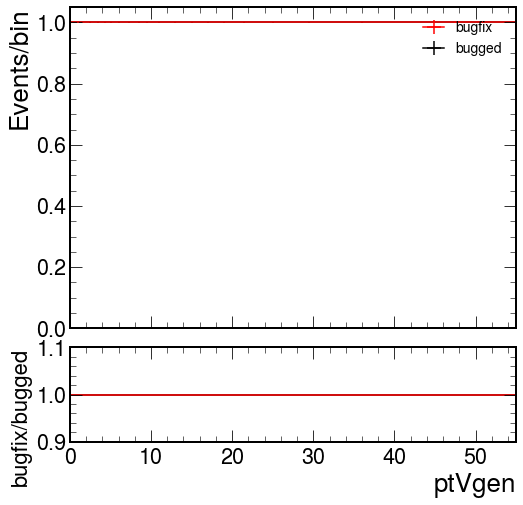

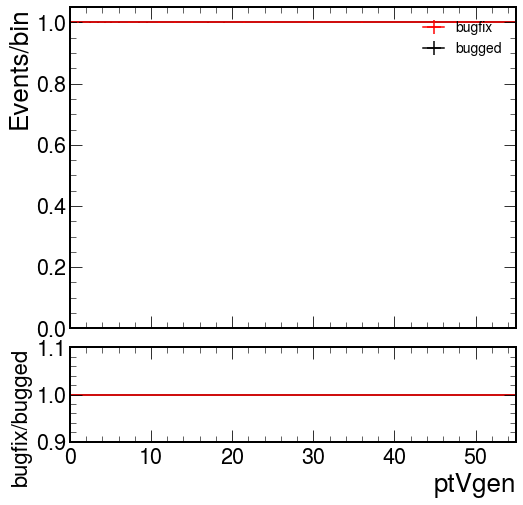

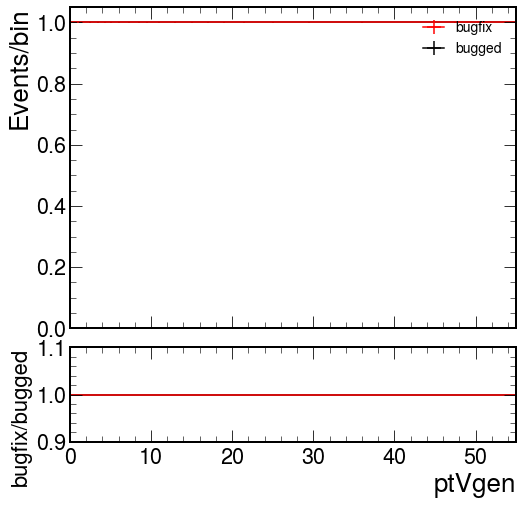

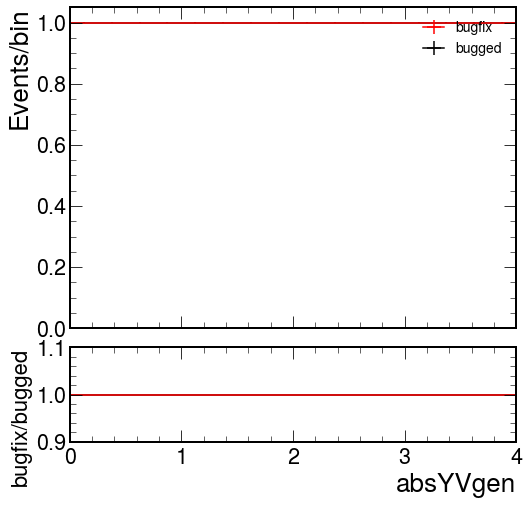

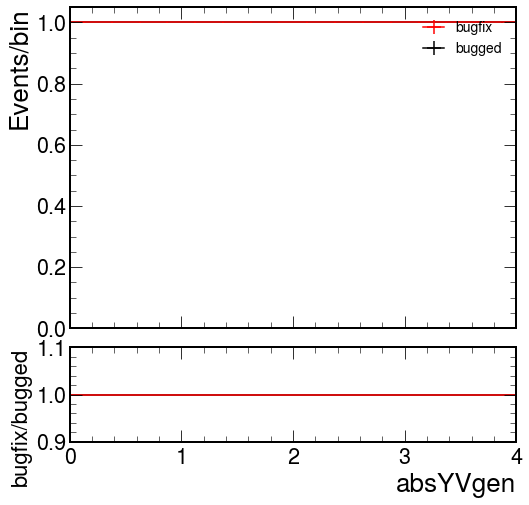

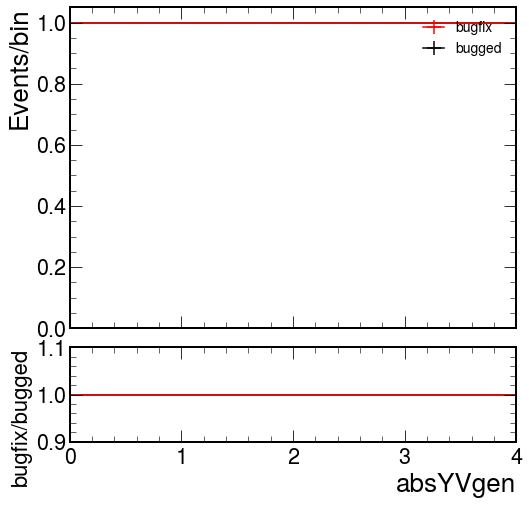

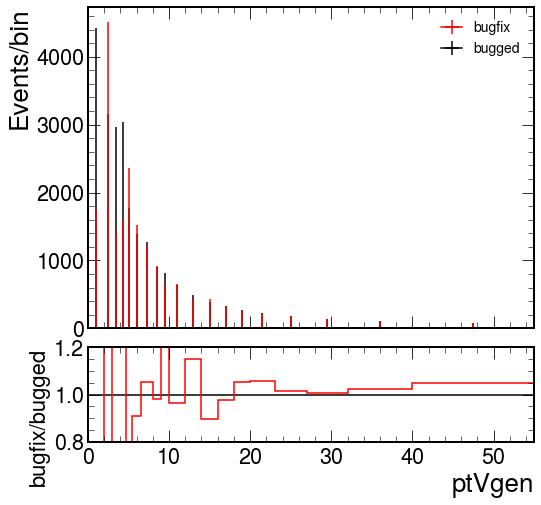

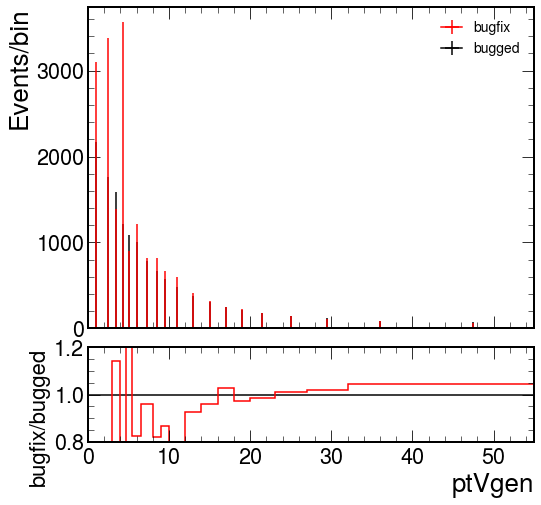

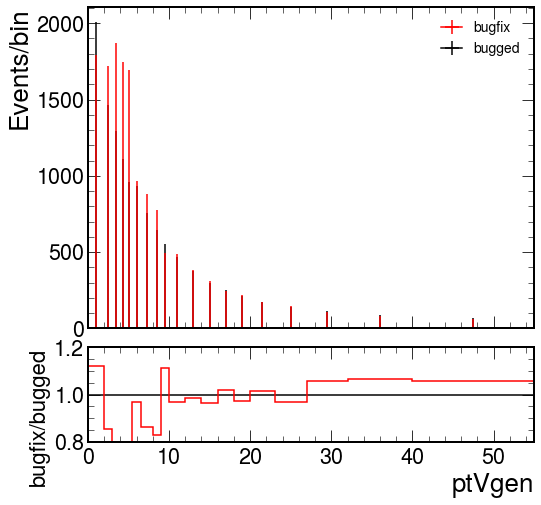

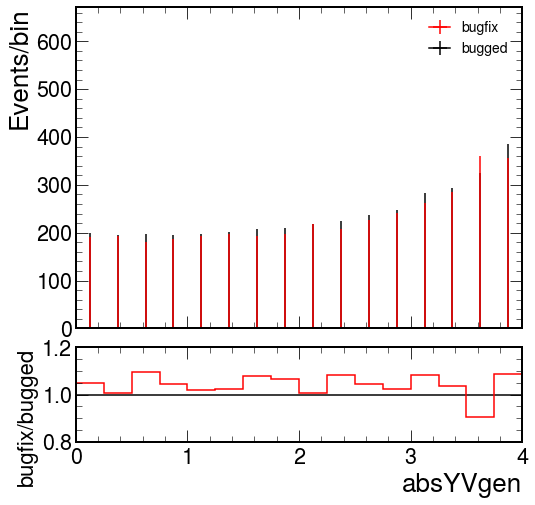

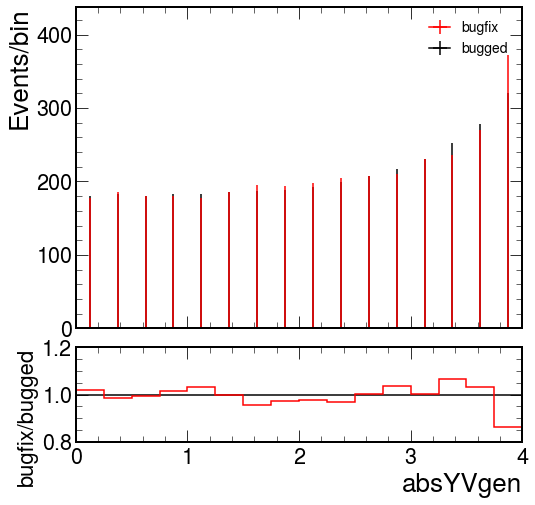

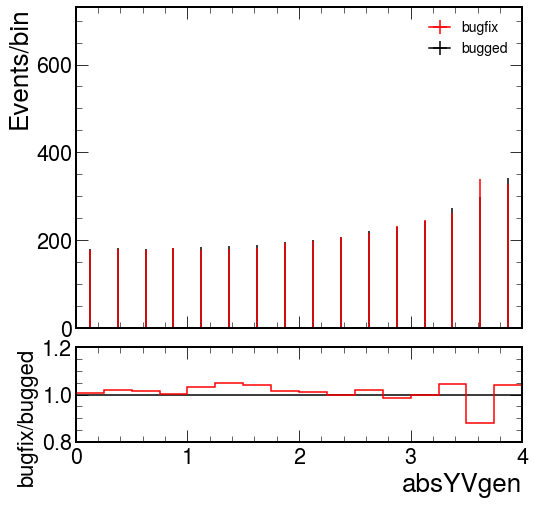

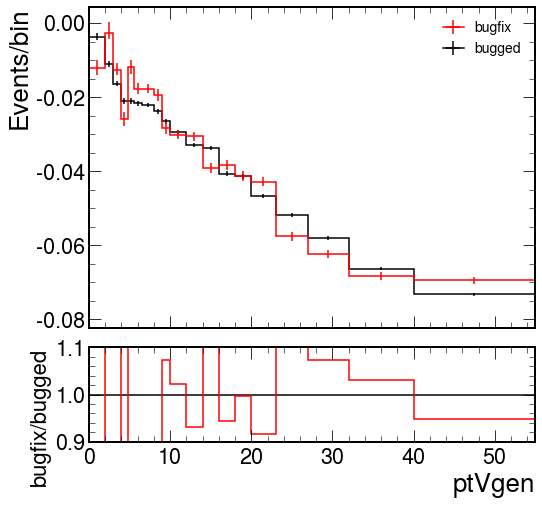

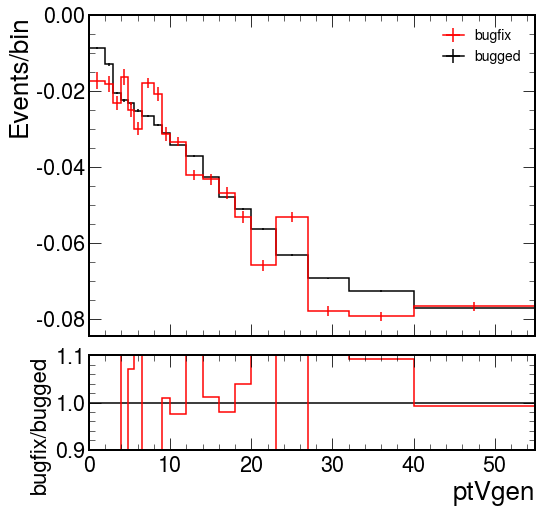

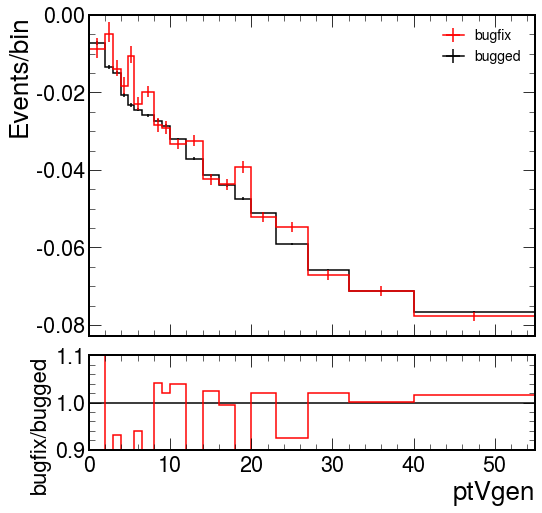

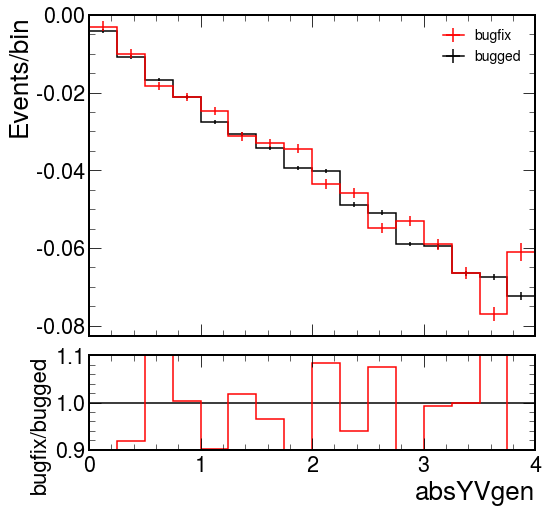

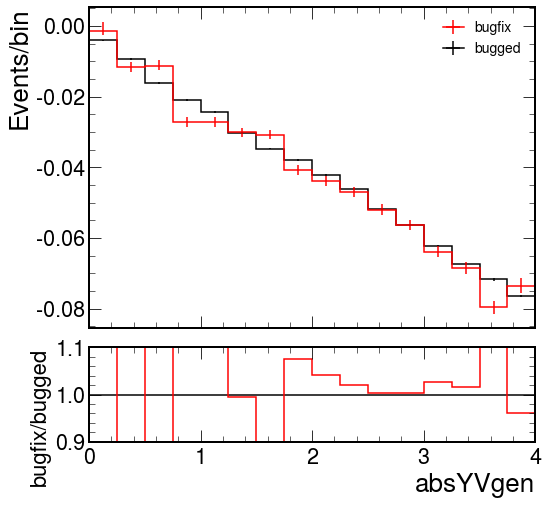

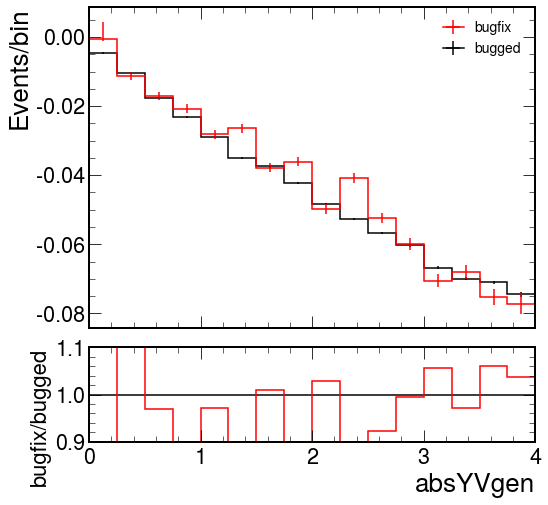

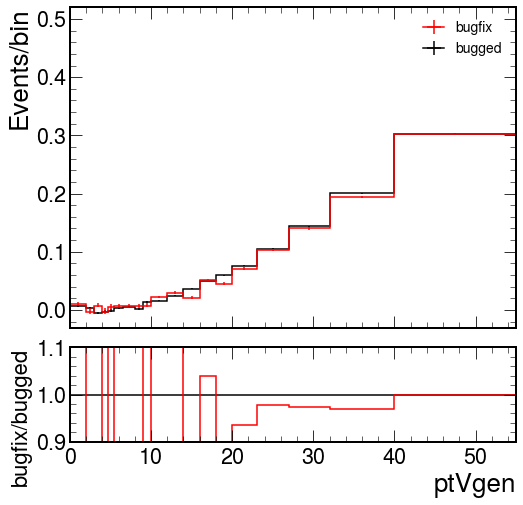

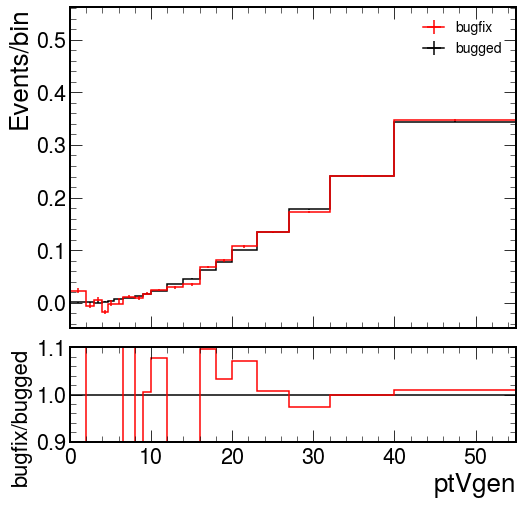

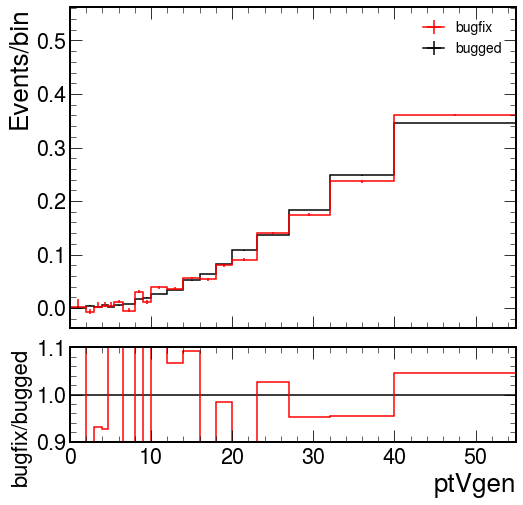

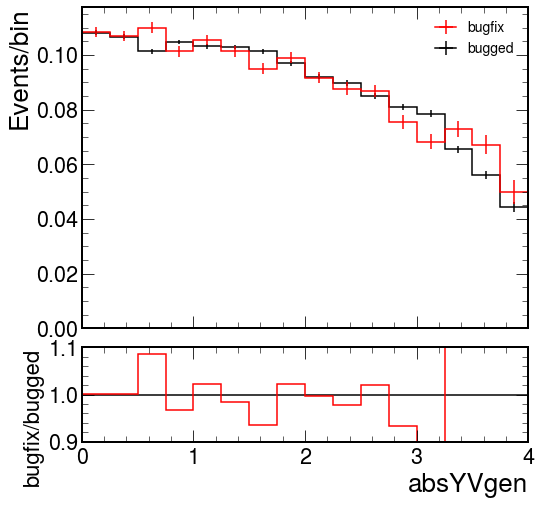

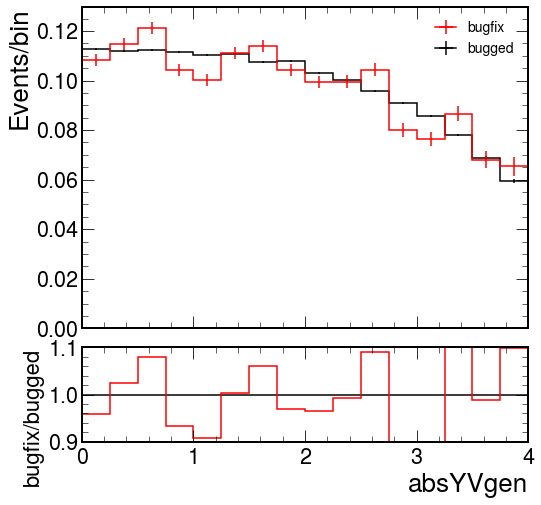

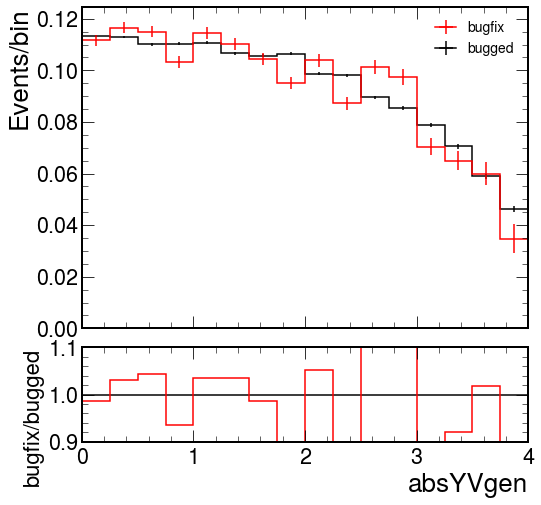

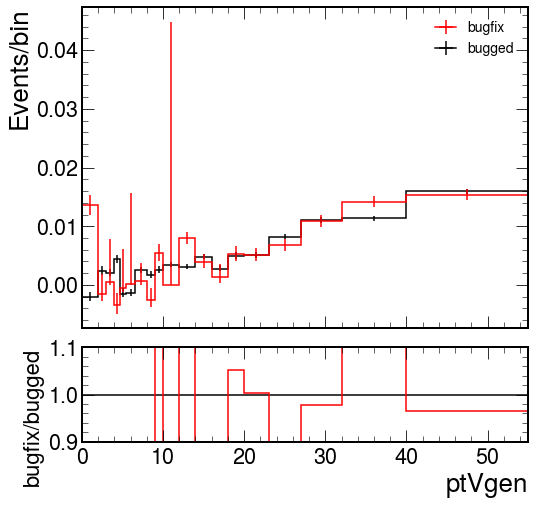

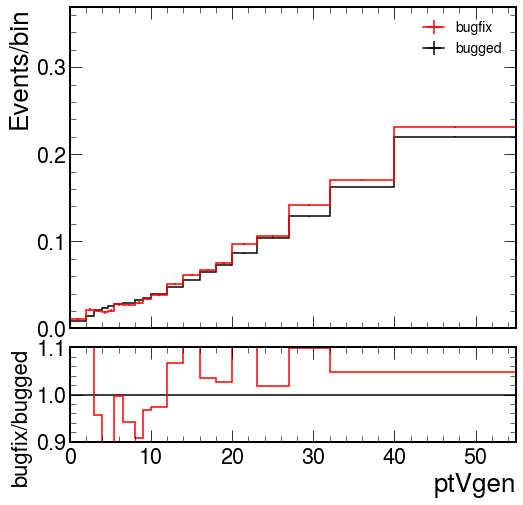

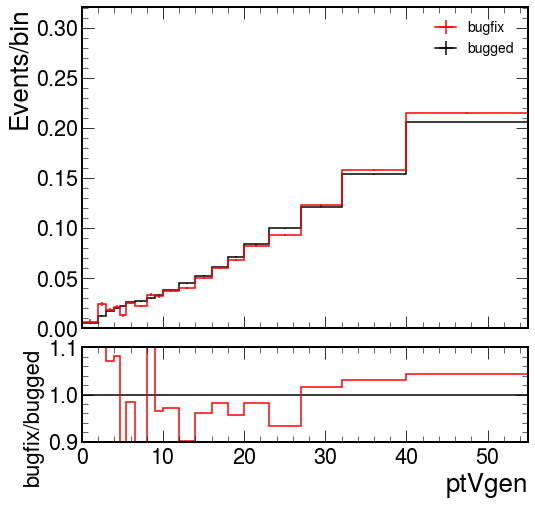

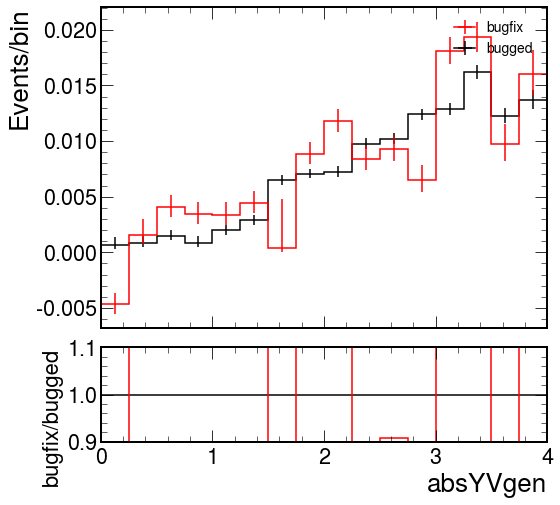

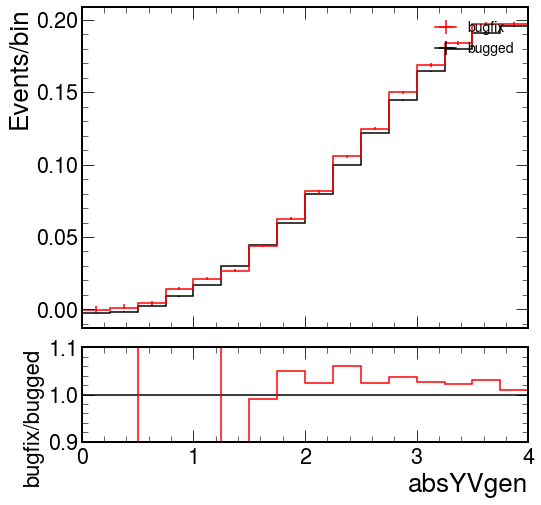

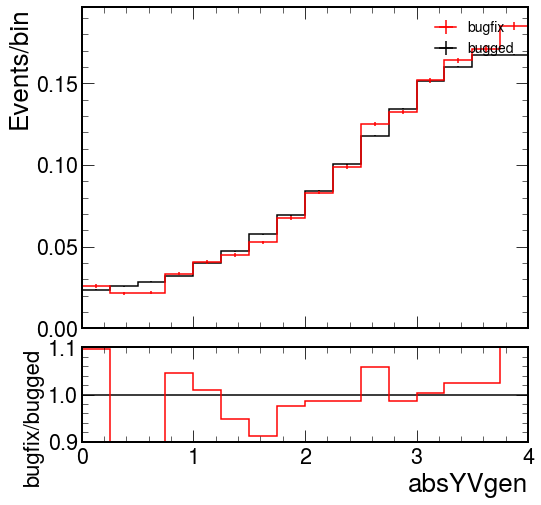

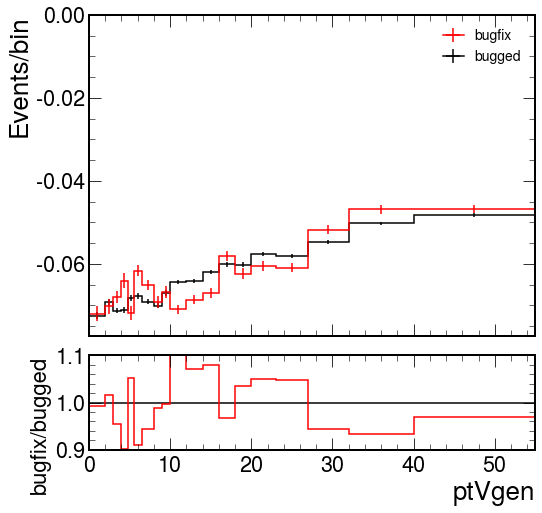

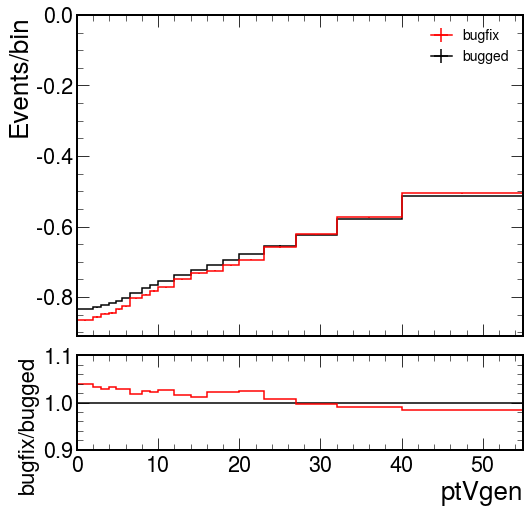

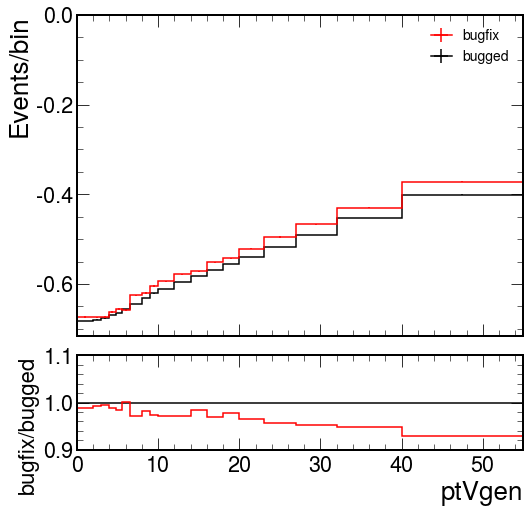

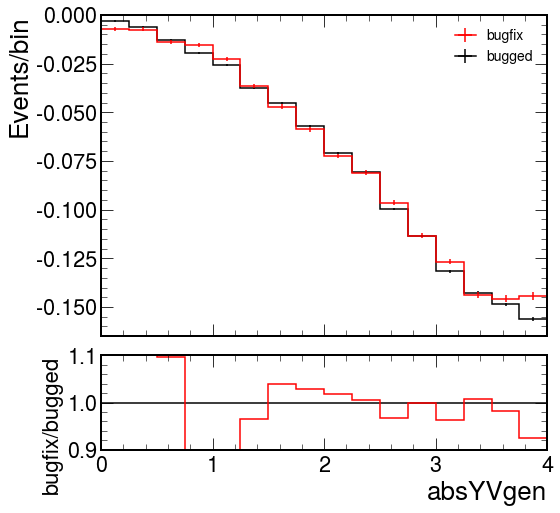

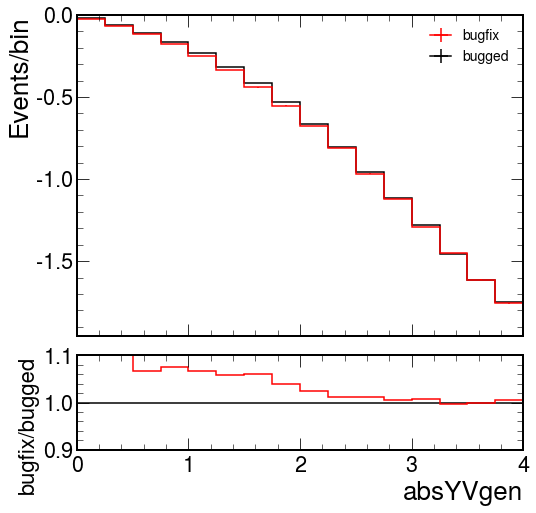

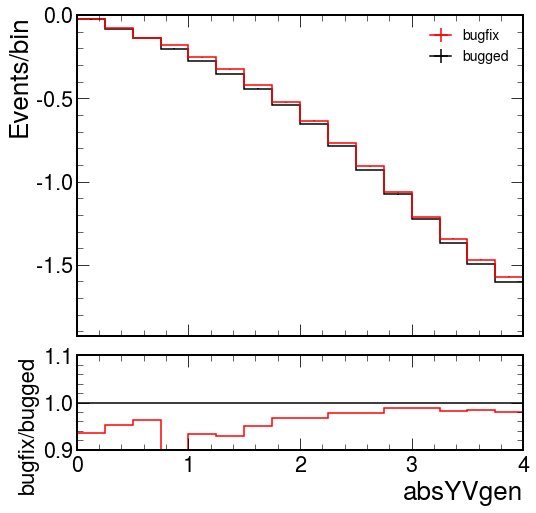

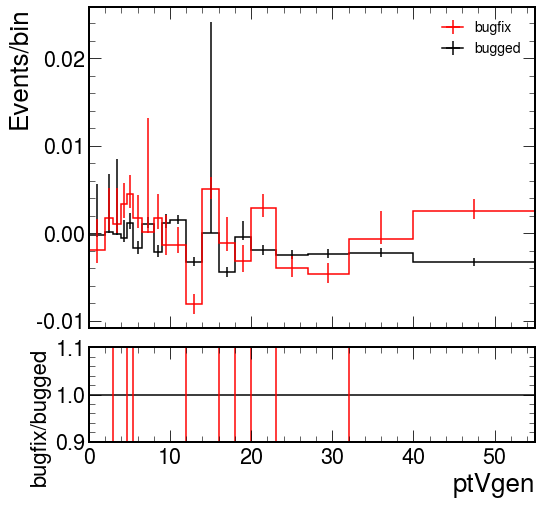

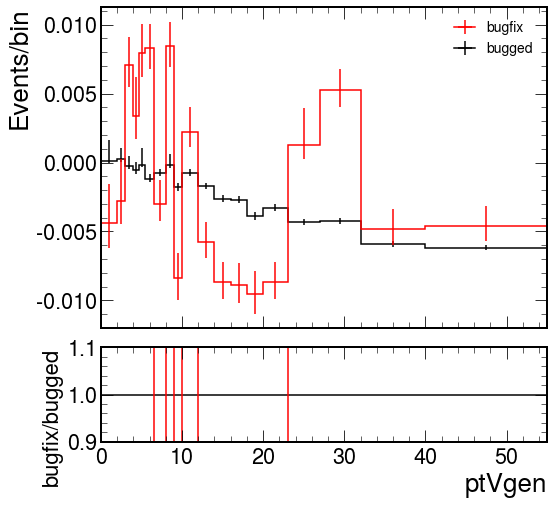

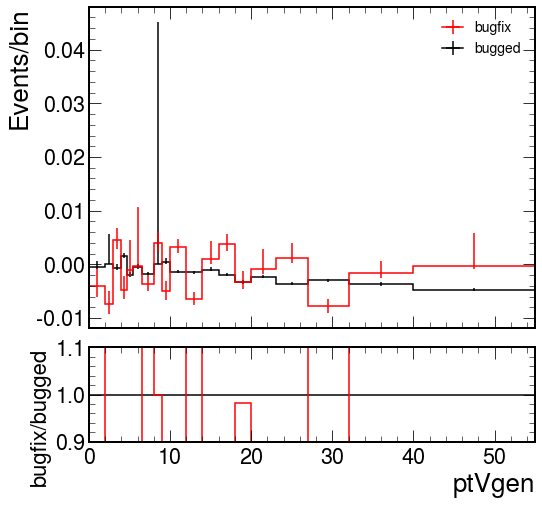

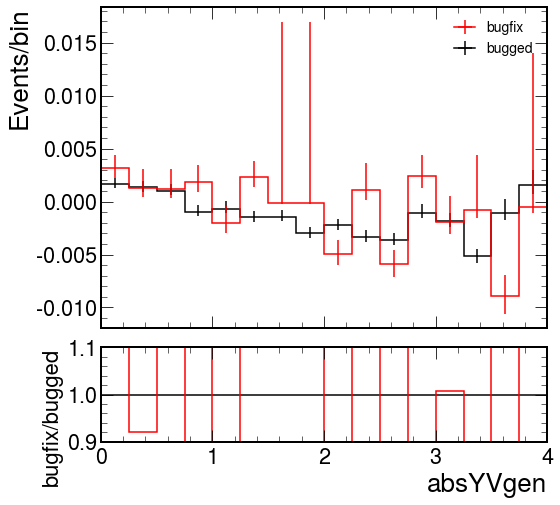

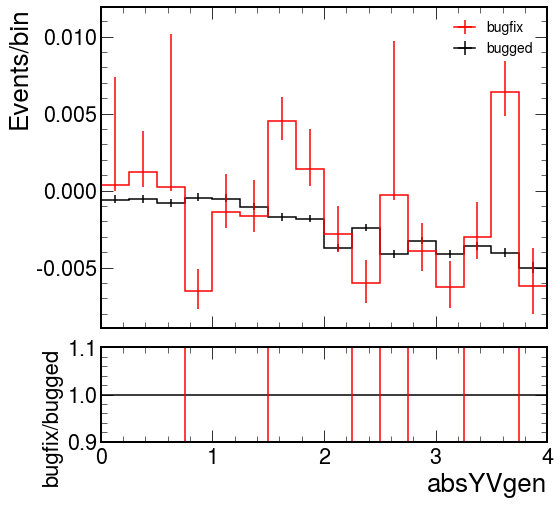

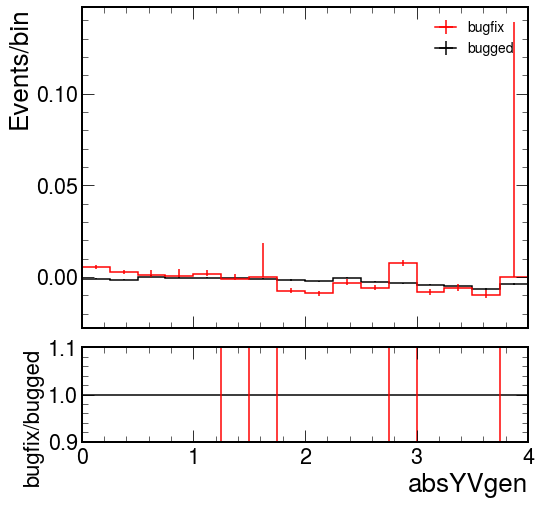

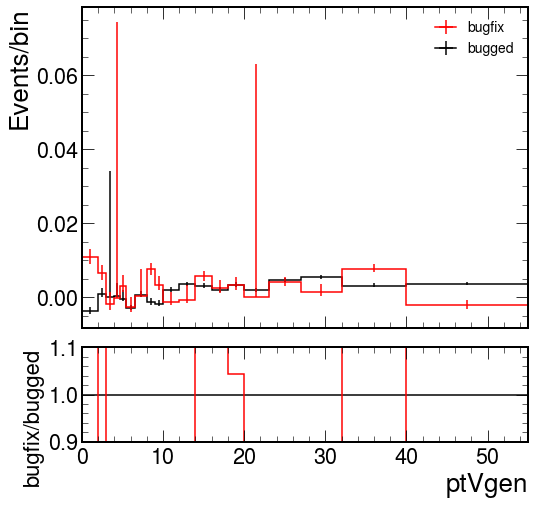

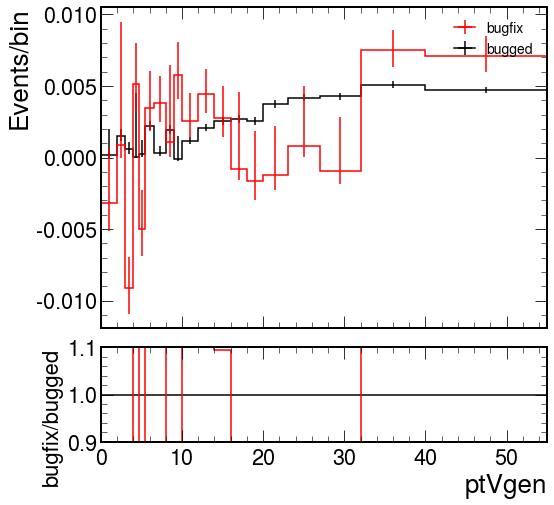

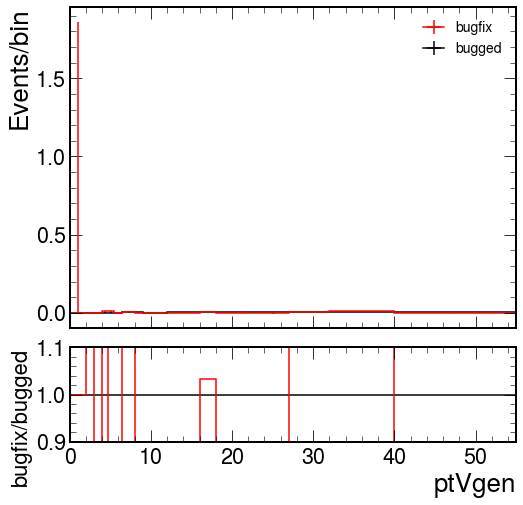

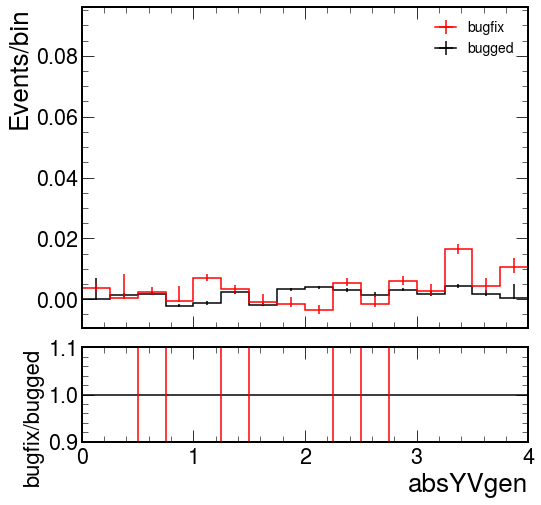

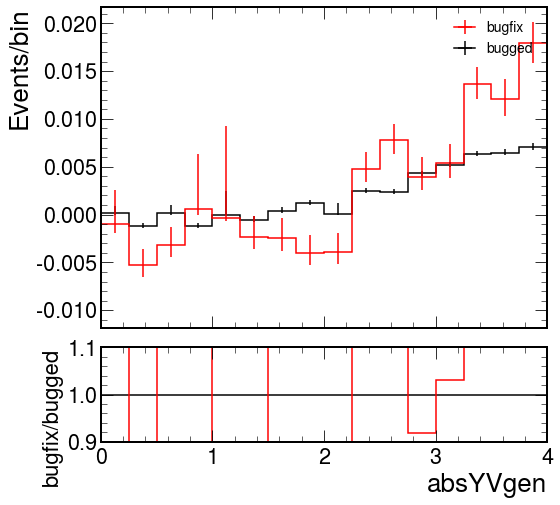

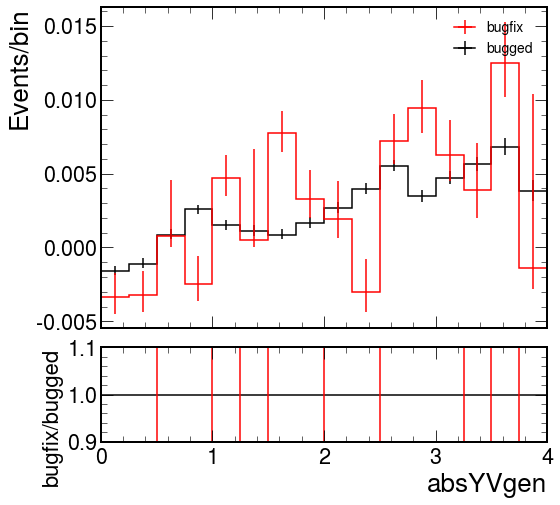

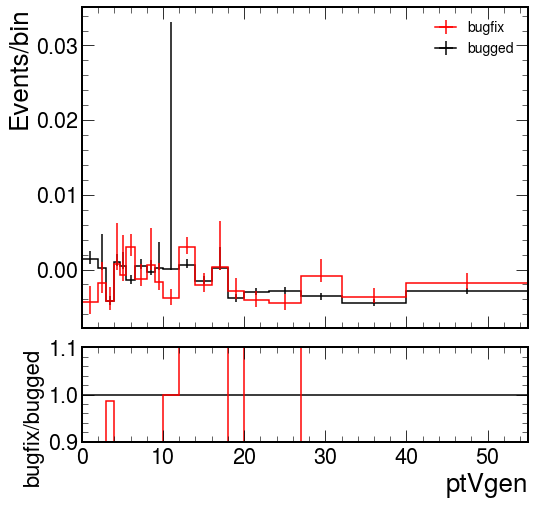

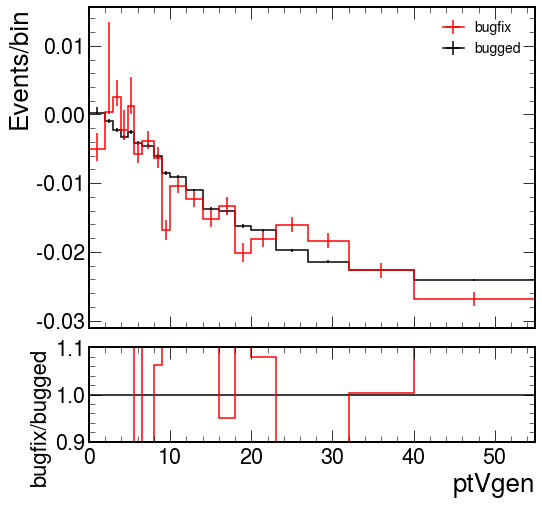

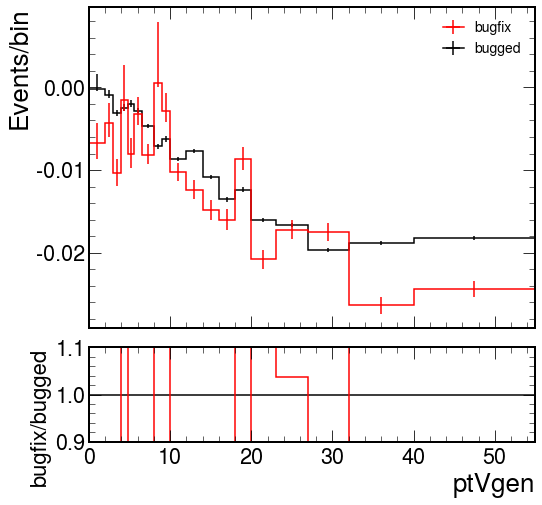

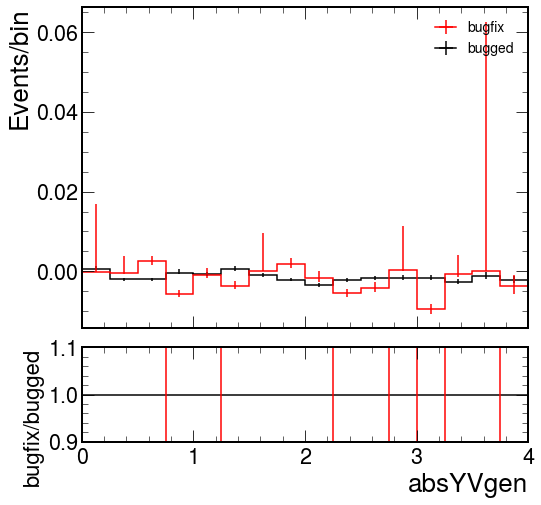

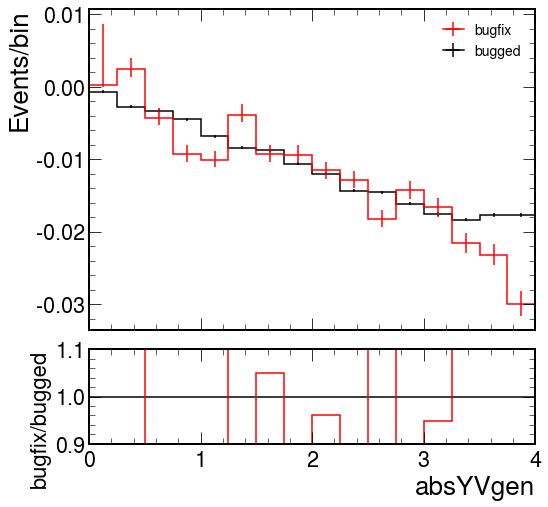

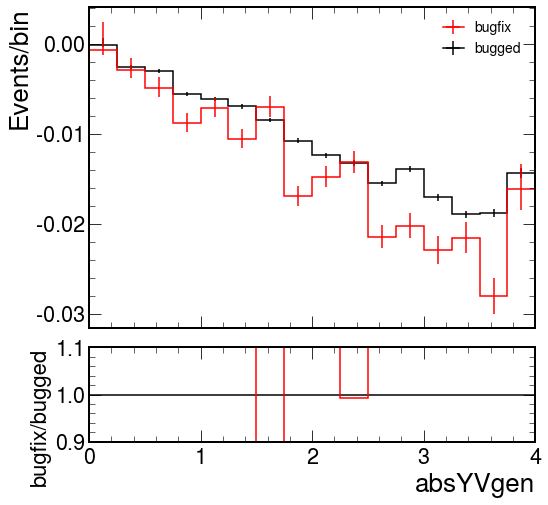

In [15]:
rrange_opt = None

for idx_ang in range(-1,8):
    if idx_ang == -1:
        ang_name = "Const_term"
    else:
        ang_name = f"A_{idx_ang}"
    
    rrange_opt = [0.9,1.1]
    if idx_ang == 0:
        rrange_opt = [0.8,1.2]

    for idx_ax, ax in enumerate(projection_axes):
        fig_z = plot_tools.makePlotWithRatioToRef(
            [hist1D_ang_coeff['z']['bugged'][ax][{"helicity":hist.loc(idx_ang)}], 
             hist1D_ang_coeff['z']['bugfix'][ax][{"helicity":hist.loc(idx_ang)}]], 
            ["bugged", 'bugfix'], 
            colors=['black', 'red'], 
            xlabel=ax, 
            ylabel="Events/bin",
            rlabel="bugfix/bugged",
            rrange=rrange_opt,
            xlim=None, binwnorm=None, baseline=True)
        fig_wp = plot_tools.makePlotWithRatioToRef(
            [hist1D_ang_coeff['wp']['bugged'][ax][{"helicity":hist.loc(idx_ang)}], 
             hist1D_ang_coeff['wp']['bugfix'][ax][{"helicity":hist.loc(idx_ang)}]], 
            ["bugged", 'bugfix'], 
            colors=['black', 'red'], 
            xlabel=ax, 
            ylabel="Events/bin",
            rlabel="bugfix/bugged",
            rrange=rrange_opt,
            xlim=None, binwnorm=None, baseline=True)
        fig_wm = plot_tools.makePlotWithRatioToRef(
            [hist1D_ang_coeff['wm']['bugged'][ax][{"helicity":hist.loc(idx_ang)}], 
             hist1D_ang_coeff['wm']['bugfix'][ax][{"helicity":hist.loc(idx_ang)}]], 
            ["bugged", 'bugfix'], 
            colors=['black', 'red'], 
            xlabel=ax, 
            ylabel="Events/bin",
            rlabel="bugfix/bugged",
            rrange=rrange_opt,
            xlim=None, binwnorm=None, baseline=True)
        fig_z.savefig(f"ang_coeff-{ang_name}-{ax}-Z.pdf")
        fig_wp.savefig(f"ang_coeff-{ang_name}-{ax}-wp.pdf")
        fig_wm.savefig(f"ang_coeff-{ang_name}-{ax}-wm.pdf")
        fig_z.savefig(f"ang_coeff-{ang_name}-{ax}-Z.png")
        fig_wp.savefig(f"ang_coeff-{ang_name}-{ax}-wp.png")
        fig_wm.savefig(f"ang_coeff-{ang_name}-{ax}-wm.png")

/opt/venv/lib/python3.10/site-packages/mplhep/error_estimation.py:48: RuntimeWarning: divide by zero encountered in true_divide
  counts = sumw / scale


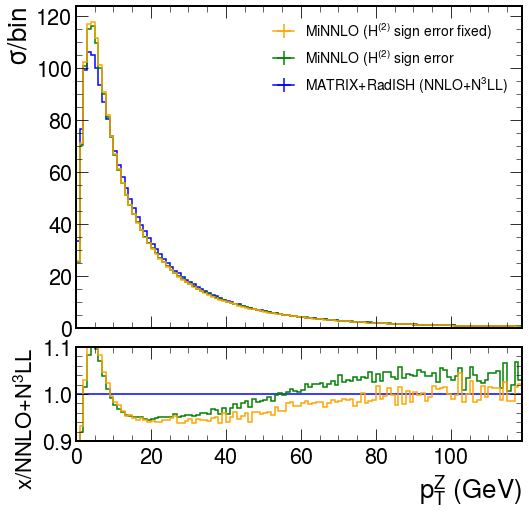

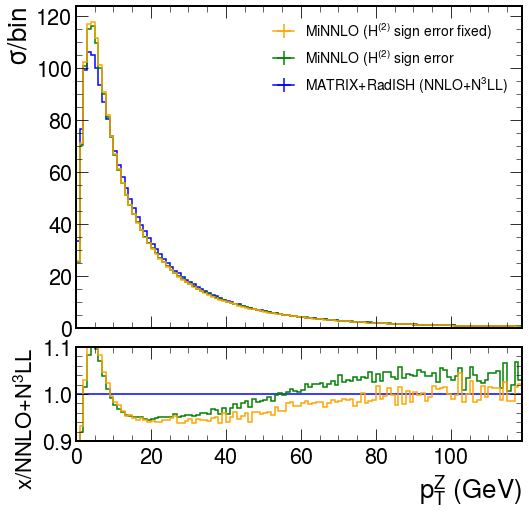

In [16]:
import uproot
f = uproot.open("/eos/user/k/kelong/HistFiles/ZGen/ZToMuMu_MATRIX_RadISH_MatchEWParams_NNPDF31.root")
hist_corr = f["DYm50_matrix__radish/ptZ_lhe_mm"].to_hist()

with lz4.frame.open("../w_z_gen_dists_fine_bin.pkl.lz4") as f:
    minnlo = pickle.load(f)
    
hist_bugged = (minnlo["ZmumuPostVFP"]["output"]["nominal_gen"] *
               minnlo["ZmumuPostVFP"]["dataset"]["xsec"] / minnlo["ZmumuPostVFP"]["weight_sum"]).project('ptVgen')
hist_bugfix = (minnlo["ZmumuPostVFP_bugfix"]["output"]["nominal_gen"] *
               minnlo["ZmumuPostVFP_bugfix"]["dataset"]["xsec"] / minnlo["ZmumuPostVFP_bugfix"]["weight_sum"]).project('ptVgen')

plot_tools.makePlotWithRatioToRef(
            [hist_corr, 
             hist_bugged,
             hist_bugfix], 
            ["MATRIX+RadISH (NNLO+N$^{3}$LL)", "MiNNLO (H$^{(2)}$ sign error", "MiNNLO (H$^{(2)}$ sign error fixed)"], 

            colors=['blue', 'green', 'orange'], 
            xlabel="$p_T^Z$ (GeV)", 
            ylabel="$\sigma$/bin",
            rlabel="x/NNLO+N$^{3}$LL",
            rrange=[0.9, 1.1],
            xlim=None, binwnorm=None, baseline=True)

In [17]:
file['WplusmunuPostVFP_bugfix' ]['output']['nominal_gen'].project('ptVgen')

Hist(Variable([0, 2, 3, 4, 4.75, 5.5, 6.5, 8, 9, 10, 12, 14, 16, 18, 20, 23, 27, 32, 40, 55, 100], name='ptVgen', label='ptVgen'), storage=Weight()) # Sum: WeightedSum(value=1.16352e+07, variance=1.38314e+07) (WeightedSum(value=1.17967e+07, variance=1.3993e+07) with flow)

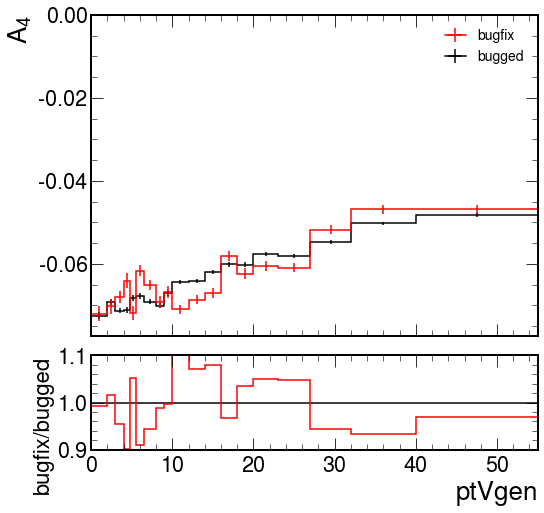

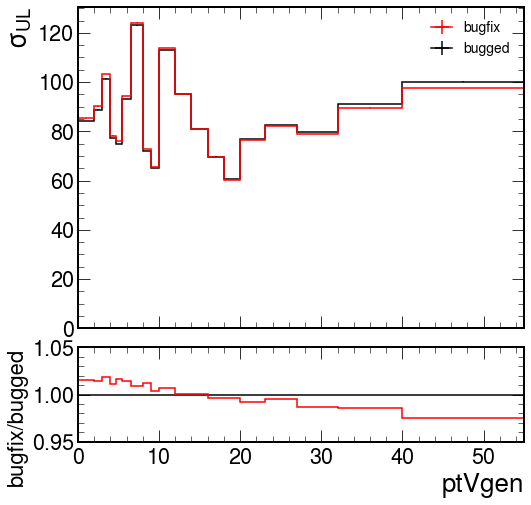

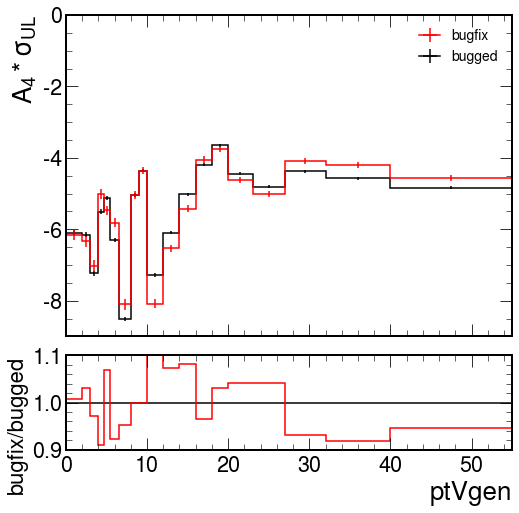

In [18]:
fig = plot_tools.makePlotWithRatioToRef(
            [hist1D_ang_coeff['z']['bugged']['ptVgen'][{"helicity":4j}], 
             hist1D_ang_coeff['z']['bugfix']['ptVgen'][{"helicity":4j}]],
            ["bugged", 'bugfix'], 
            colors=['black', 'red'], 
            xlabel='ptVgen', 
            ylabel="$A_4$",
            rlabel="bugfix/bugged",
            rrange=rrange_opt,
            xlim=None, binwnorm=None, baseline=True)

fig = plot_tools.makePlotWithRatioToRef(
            [sigma_UL['z']['bugged'], 
             sigma_UL['z']['bugfix']],
            ["bugged", 'bugfix'], 
            colors=['black', 'red'], 
            xlabel='ptVgen', 
            ylabel="$\sigma_{UL}$",
            rlabel="bugfix/bugged",
            rrange=[0.95,1.05],
            xlim=None, binwnorm=None, baseline=True)

fig = plot_tools.makePlotWithRatioToRef(
            [hh.multiplyHists(hist1D_ang_coeff['z']['bugged']['ptVgen'][{"helicity":4j}], sigma_UL['z']['bugged'], allowBroadcast=True), 
             hh.multiplyHists(hist1D_ang_coeff['z']['bugfix']['ptVgen'][{"helicity":4j}], sigma_UL['z']['bugfix'], allowBroadcast=True)],
            ["bugged", 'bugfix'], 
            colors=['black', 'red'], 
            xlabel='ptVgen', 
            ylabel="$A_4 * \sigma _{UL}$",
            rlabel="bugfix/bugged",
            rrange=rrange_opt,
            xlim=None, binwnorm=None, baseline=True)

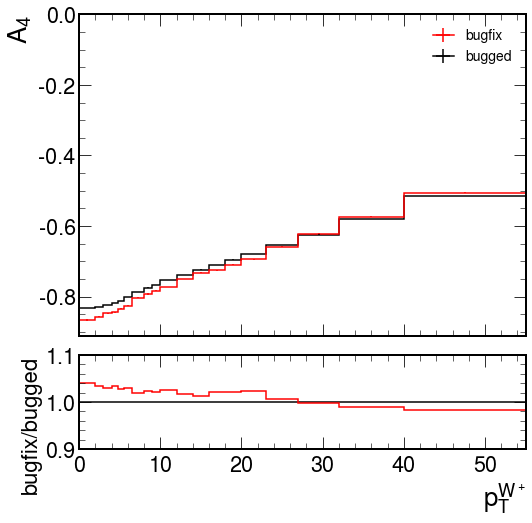

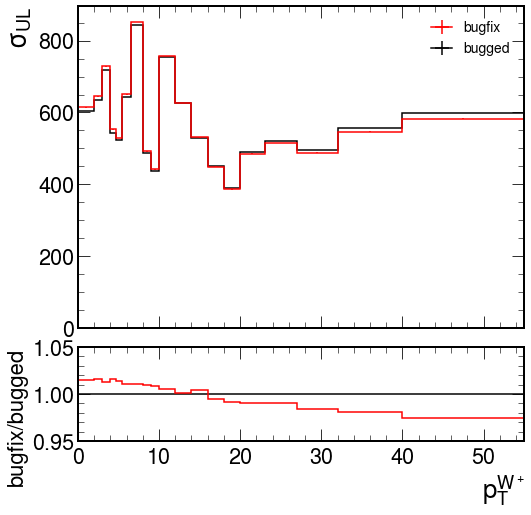

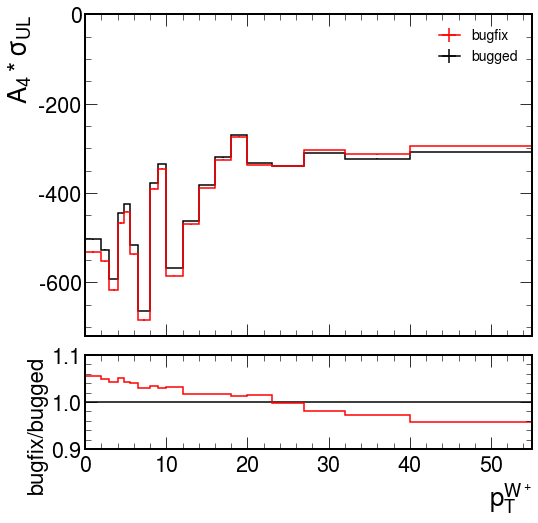

In [19]:
fig = plot_tools.makePlotWithRatioToRef(
            [hist1D_ang_coeff['wp']['bugged']['ptVgen'][{"helicity":4j}], 
             hist1D_ang_coeff['wp']['bugfix']['ptVgen'][{"helicity":4j}]],
            ["bugged", 'bugfix'], 
            colors=['black', 'red'], 
            xlabel='$p_T^{W^+}$', 
            ylabel="$A_4$",
            rlabel="bugfix/bugged",
            rrange=rrange_opt,
            xlim=None, binwnorm=None, baseline=True)

fig = plot_tools.makePlotWithRatioToRef(
            [sigma_UL['wp']['bugged'], 
             sigma_UL['wp']['bugfix']],
            ["bugged", 'bugfix'], 
            colors=['black', 'red'], 
            xlabel='$p_T^{W^+}$', 
            ylabel="$\sigma_{UL}$",
            rlabel="bugfix/bugged",
            rrange=[0.95,1.05],
            xlim=None, binwnorm=None, baseline=True)

fig = plot_tools.makePlotWithRatioToRef(
            [hh.multiplyHists(hist1D_ang_coeff['wp']['bugged']['ptVgen'][{"helicity":4j}], sigma_UL['wp']['bugged'], allowBroadcast=True), 
             hh.multiplyHists(hist1D_ang_coeff['wp']['bugfix']['ptVgen'][{"helicity":4j}], sigma_UL['wp']['bugfix'], allowBroadcast=True)],
            ["bugged", 'bugfix'], 
            colors=['black', 'red'], 
            xlabel='$p_T^{W^+}$', 
            ylabel="$A_4 * \sigma _{UL}$",
            rlabel="bugfix/bugged",
            rrange=rrange_opt,
            xlim=None, binwnorm=None, baseline=True)

In [20]:
with lz4.frame.open("../w_z_gen_dists_slc7.pkl.lz4") as f:
    file_slc7 = pickle.load(f)
hist_ang_coeff = {}
sigma_UL = {}
boson_channels = ['wm']
projection_axes = ['ptVgen', 'absYVgen']
for chn in boson_channels:
    hist_ang_coeff[chn] = {}
    sigma_UL[chn] = {}

# read full histogram for angular coefficients

hist_ang_coeff['wm']['bugged'     ] = file_slc7['WminusmunuPostVFP'            ]['output']['helicity_moments_scale']
hist_ang_coeff['wm']['bugfix'     ] = file_slc7['WminusmunuPostVFP_bugfix'     ]['output']['helicity_moments_scale']
hist_ang_coeff['wm']['bugfix_slc7'] = file_slc7['WminusmunuPostVFP_bugfix_slc7']['output']['helicity_moments_scale']



sigma_UL['wm']['bugged'     ] = (file_slc7['WminusmunuPostVFP'            ]['output']['nominal_gen']* file_slc7["WminusmunuPostVFP"            ]["dataset"]["xsec"] / file_slc7["WminusmunuPostVFP"            ]["weight_sum"]).project('ptVgen')
sigma_UL['wm']['bugfix'     ] = (file_slc7['WminusmunuPostVFP_bugfix'     ]['output']['nominal_gen']* file_slc7["WminusmunuPostVFP_bugfix"     ]["dataset"]["xsec"] / file_slc7["WminusmunuPostVFP_bugfix"     ]["weight_sum"]).project('ptVgen')
sigma_UL['wm']['bugfix_slc7'] = (file_slc7['WminusmunuPostVFP_bugfix_slc7']['output']['nominal_gen']* file_slc7["WminusmunuPostVFP_bugfix_slc7"]["dataset"]["xsec"] / file_slc7["WminusmunuPostVFP_bugfix_slc7"]["weight_sum"]).project('ptVgen')

# make projected 1D histograms; "normalize" and calculate the angular coefficients 
hist1D_ang_coeff = {}
s = hist.tag.Slicer()
for chn in boson_channels:
    hist1D_ang_coeff[chn] = {}
    for group in ['bugged', 'bugfix', 'bugfix_slc7']:
        hist1D_ang_coeff[chn][group] = {}
        for ax in projection_axes:
            if chn == 'z':
                hist1D_ang_coeff[chn][group][ax] = wremnants.moments_to_angular_coeffs(hist_ang_coeff[chn][group][{'massVgen':s[80j:100j:hist.sum]}].project('helicity',ax))
            else:
                hist1D_ang_coeff[chn][group][ax] = wremnants.moments_to_angular_coeffs(hist_ang_coeff[chn][group].project('helicity',ax))


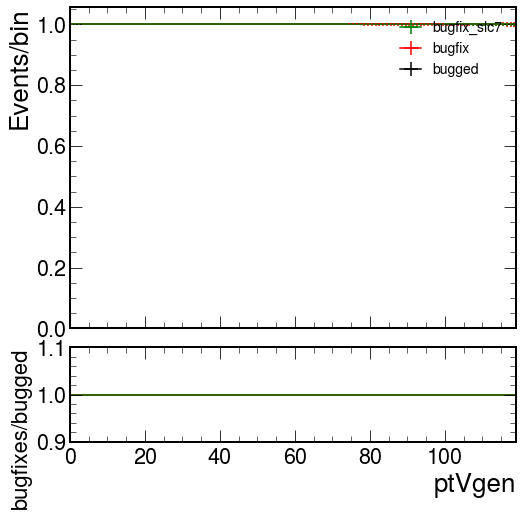

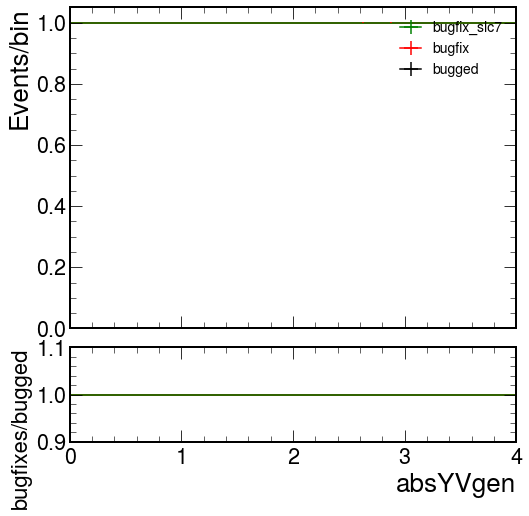

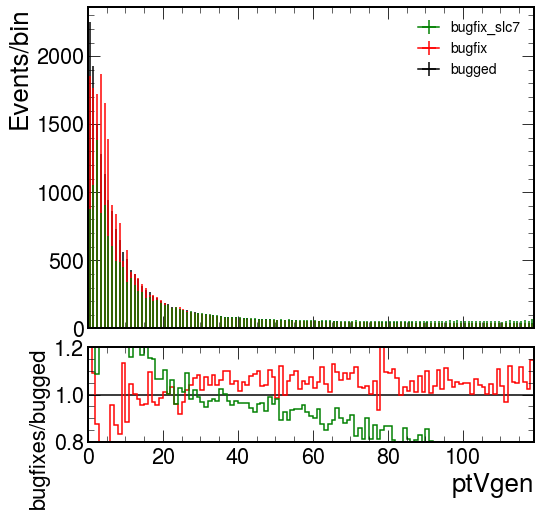

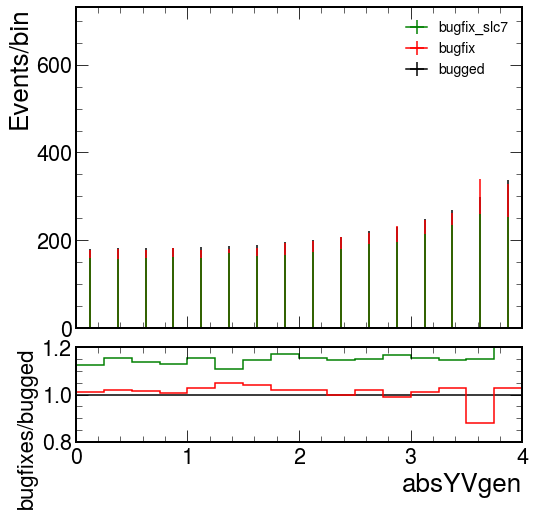

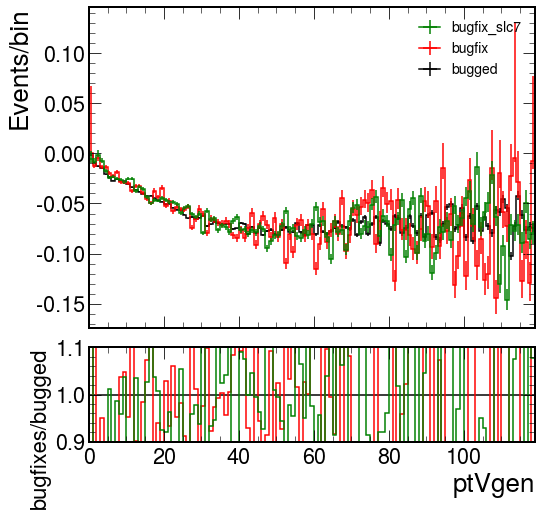

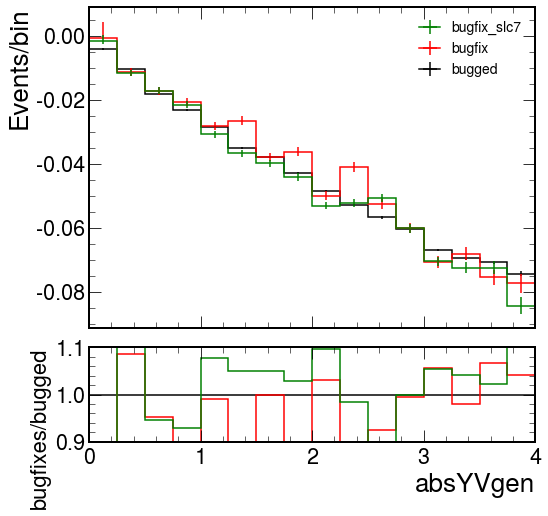

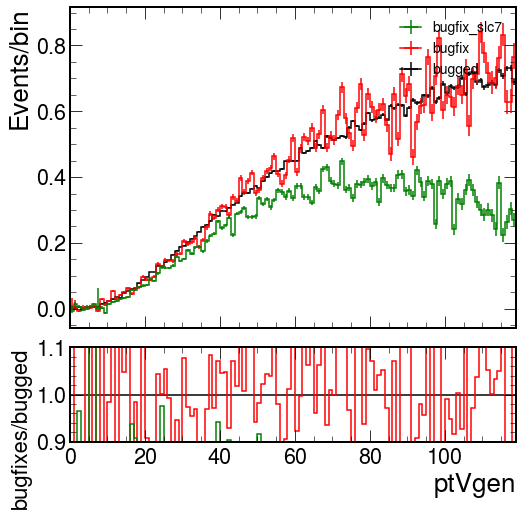

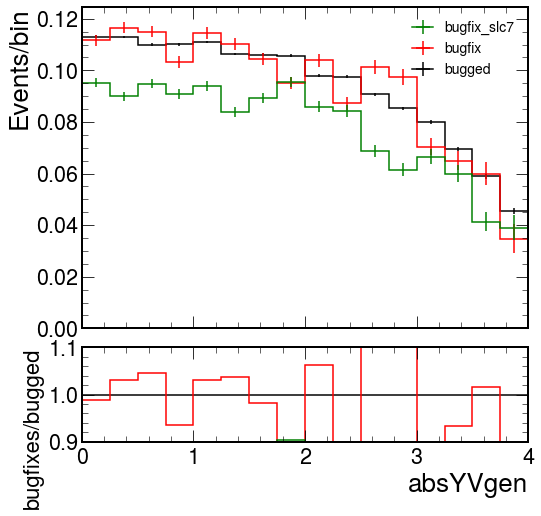

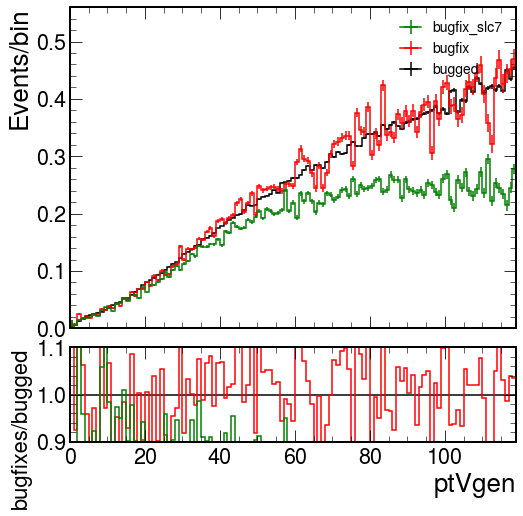

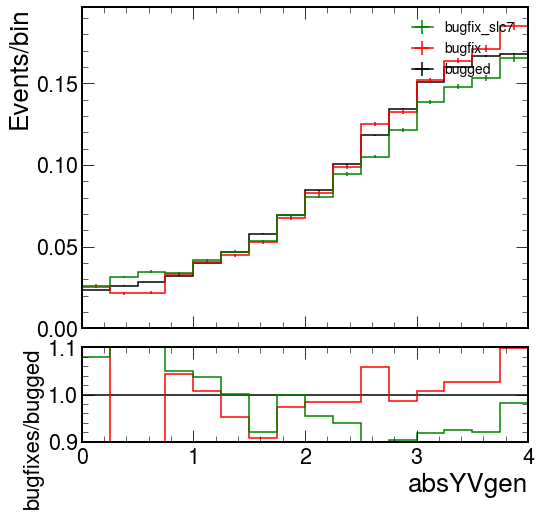

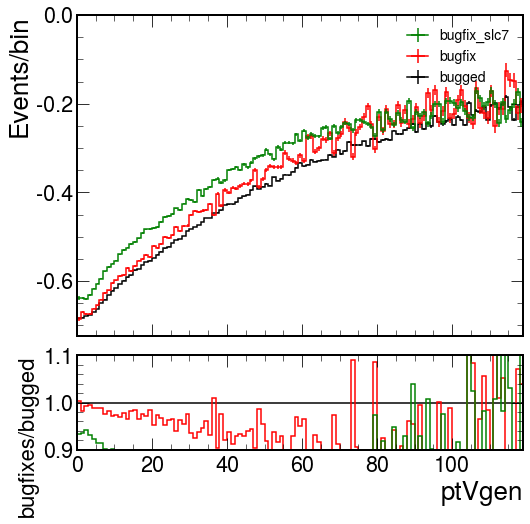

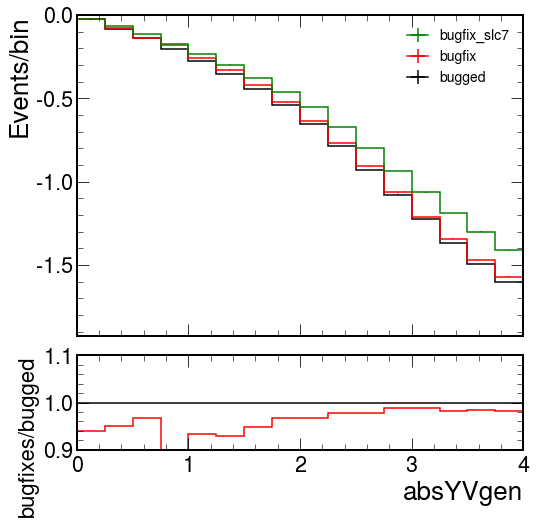

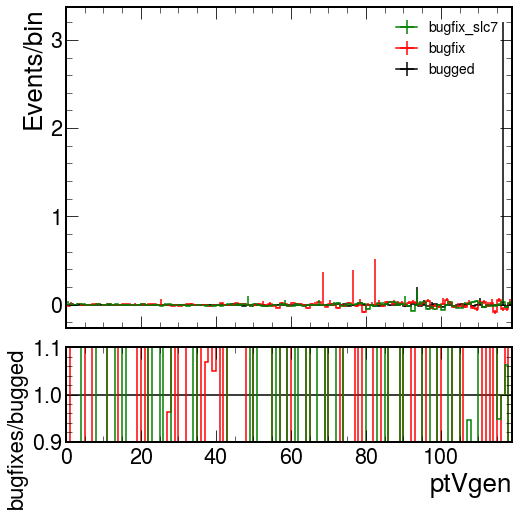

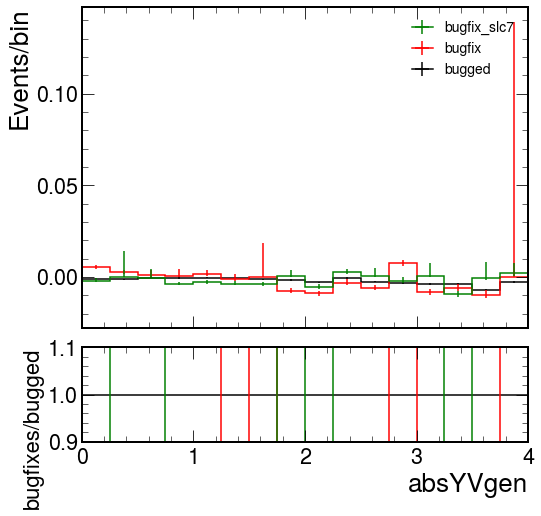

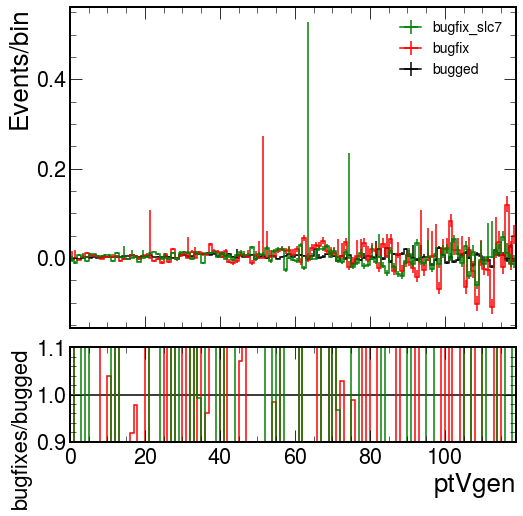

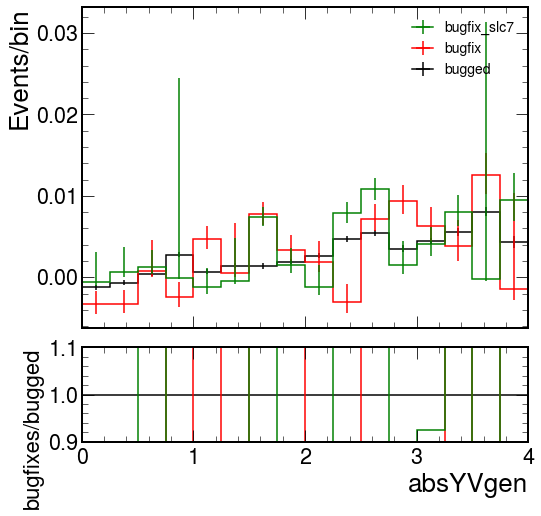

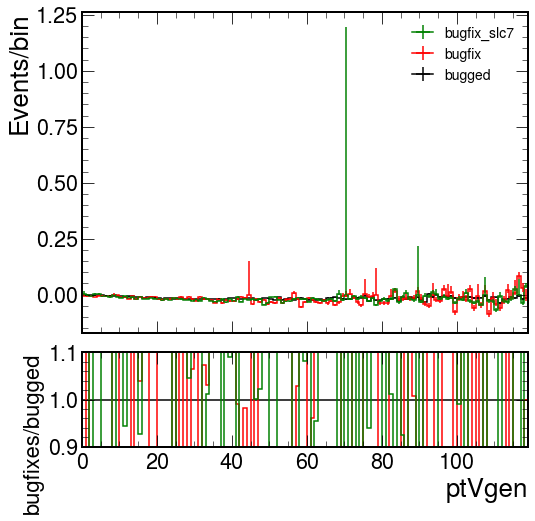

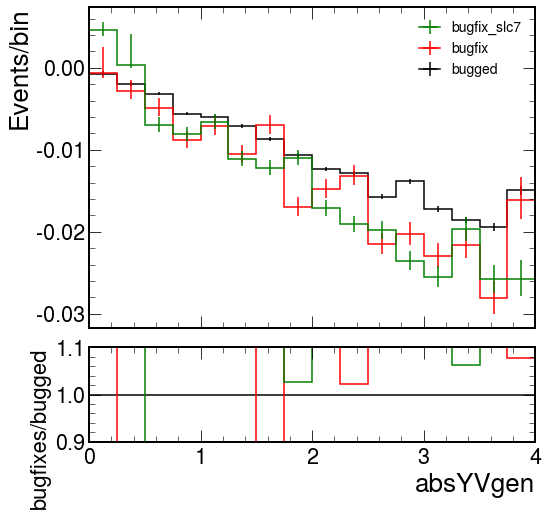

In [21]:
rrange_opt = None

for idx_ang in range(-1,8):
    if idx_ang == -1:
        ang_name = "Const_term"
    else:
        ang_name = f"A_{idx_ang}"
    
    rrange_opt = [0.9,1.1]
    if idx_ang == 0:
        rrange_opt = [0.8,1.2]

    for idx_ax, ax in enumerate(projection_axes):
        fig_wm = plot_tools.makePlotWithRatioToRef(
            [hist1D_ang_coeff['wm']['bugged'][ax][{"helicity":hist.loc(idx_ang)}], 
             hist1D_ang_coeff['wm']['bugfix'][ax][{"helicity":hist.loc(idx_ang)}],
             hist1D_ang_coeff['wm']['bugfix_slc7'][ax][{"helicity":hist.loc(idx_ang)}]], 
            ["bugged", 'bugfix', 'bugfix_slc7'], 
            colors=['black', 'red', 'green'], 
            xlabel=ax, 
            ylabel="Events/bin",
            rlabel="bugfixes/bugged",
            rrange=rrange_opt,
            xlim=None, binwnorm=None, baseline=True)

        fig_wm.savefig(f"ang_coeff-{ang_name}-{ax}-wm.pdf")
        fig_wm.savefig(f"ang_coeff-{ang_name}-{ax}-wm.png")